In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("/content/ushape.csv",header=None)
df.head()


,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [41]:
df.isnull().sum()

,0
0,0
1,0
2,0


In [42]:
X = df.iloc[:,0:2].values
y  = df.iloc[:,2].values

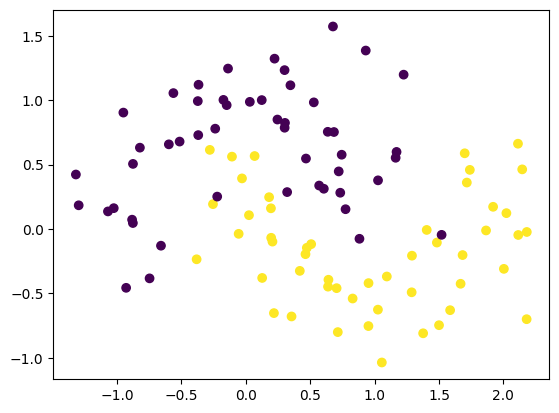

In [43]:
plt.scatter(X[:,0],X[:,1],c=y)

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

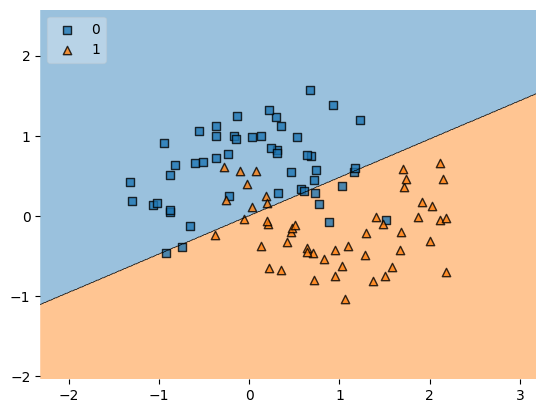

In [45]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype("int"),clf,legend=2)
plt.show()

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5,include_bias=False)
X_trfs = poly.fit_transform(X)

In [47]:
from sklearn.model_selection import cross_val_score
clf1 = LogisticRegression()

np.mean(cross_val_score(clf1,X_trfs,y,scoring="accuracy",cv=10))


np.float64(0.9)

In [52]:
def plot_decision_boundry(X,y,degree=1):
  poly = PolynomialFeatures(degree=degree)
  X_trfs = poly.fit_transform(X)

  clf = LogisticRegression()
  clf.fit(X_trfs,y)

  accuracy = np.mean(cross_val_score(clf,X_trfs,y,scoring="accuracy",cv=10))

  a = np.arange(start=X[:,0].min()-1,stop=X[:,0].max()+1,step=0.01)
  b = np.arange(start=X[:,1].min()-1,stop=X[:,1].max()+1,step=0.01)

  XX , YY = np.meshgrid(a,b)

  input_array = np.array([XX.ravel(),YY.ravel()]).T
  labels = clf.predict(poly.transform(input_array))

  plt.contour(XX,YY,labels.reshape(XX.shape),alpha=0.5)
  plt.scatter(X[:,0],X[:,1],c=y)
  plt.title(f"Degree = {degree} , accuracy = {np.round(accuracy,4)}")



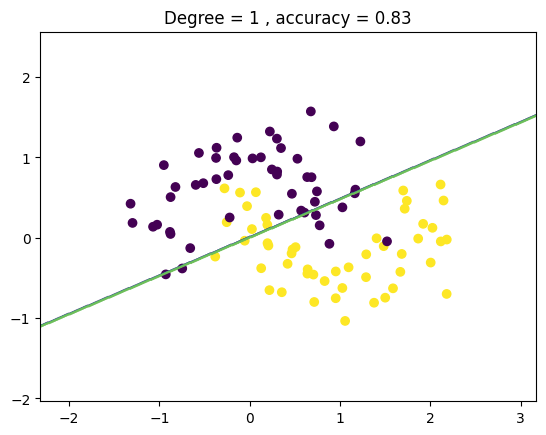

In [53]:
plot_decision_boundry(X,y)

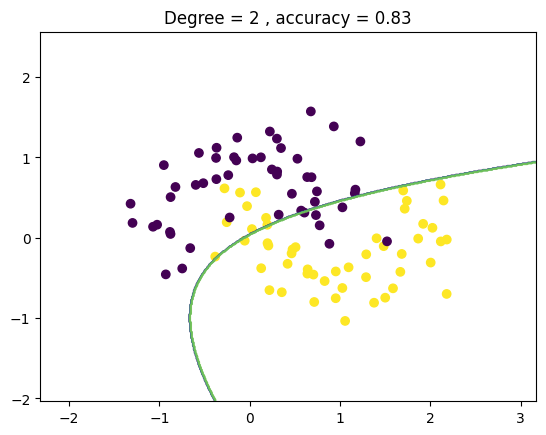

In [54]:
plot_decision_boundry(X,y,2)

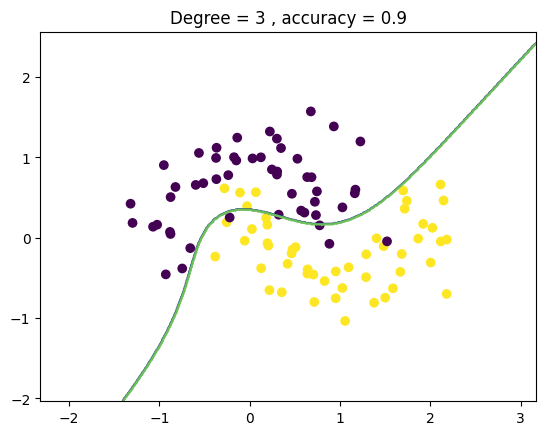

In [55]:
plot_decision_boundry(X,y,3)

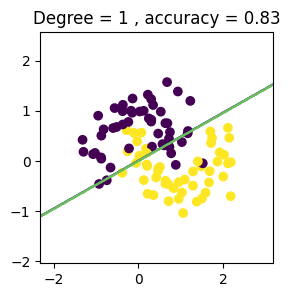

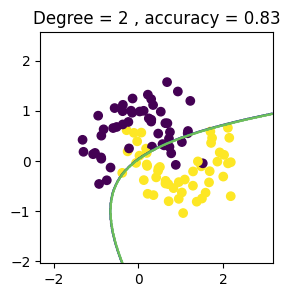

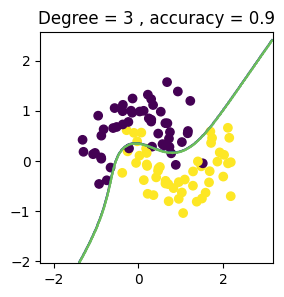

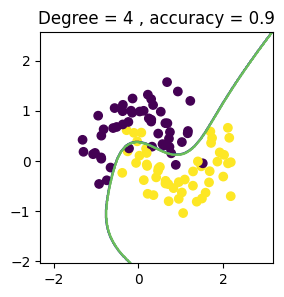

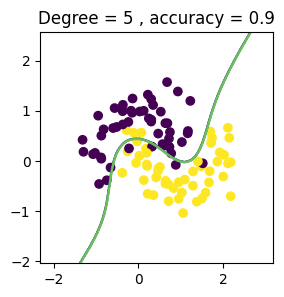

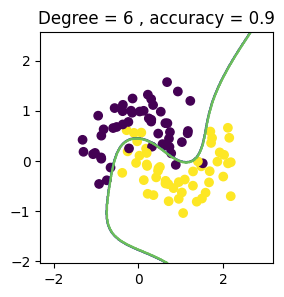

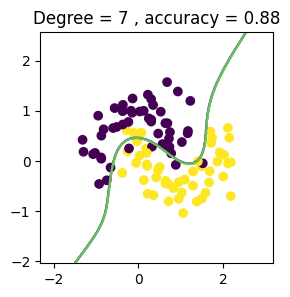

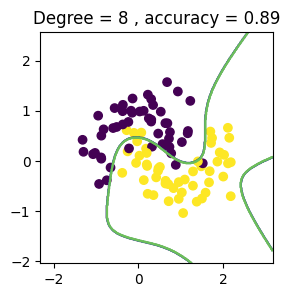

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

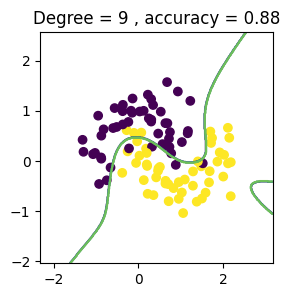

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

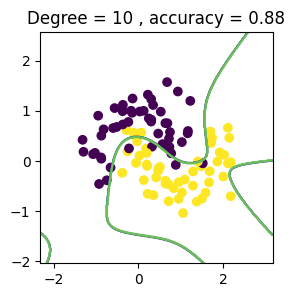

In [61]:
z = 3
for i in range(10):
  plt.figure(figsize=(z,z))
  plot_decision_boundry(X,y,i+1)
  plt.show()